In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [190]:
from sklearn.datasets import make_classification
#Create a dataset
X,y= make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [191]:
X=pd.DataFrame(X)

In [192]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,0.829274,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,0.543479,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363
2,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,-0.549925,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212
3,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,-0.241431,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,-0.695695,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368


In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [194]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  



In [195]:
model.predict_proba(X_test) #probability of positive class

array([[3.51112014e-01, 6.48887986e-01],
       [1.32095334e-01, 8.67904666e-01],
       [5.24593248e-01, 4.75406752e-01],
       [1.47364774e-01, 8.52635226e-01],
       [4.45002438e-02, 9.55499756e-01],
       [9.45724448e-01, 5.42755520e-02],
       [7.82234155e-01, 2.17765845e-01],
       [1.78147680e-01, 8.21852320e-01],
       [2.54573593e-01, 7.45426407e-01],
       [6.10423342e-01, 3.89576658e-01],
       [4.93832440e-02, 9.50616756e-01],
       [4.31275944e-01, 5.68724056e-01],
       [9.95203655e-01, 4.79634477e-03],
       [5.13966827e-01, 4.86033173e-01],
       [2.80691771e-01, 7.19308229e-01],
       [7.96254746e-01, 2.03745254e-01],
       [9.23952966e-01, 7.60470342e-02],
       [5.54754830e-02, 9.44524517e-01],
       [1.13056057e-01, 8.86943943e-01],
       [5.28455143e-01, 4.71544857e-01],
       [7.44101488e-03, 9.92558985e-01],
       [7.86898615e-01, 2.13101385e-01],
       [9.51331807e-01, 4.86681931e-02],
       [9.10512490e-01, 8.94875102e-02],
       [2.454074

In [196]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'{classification_report(y_test, y_pred)}')


Accuracy: 0.855
Confusion Matrix:
[[85  8]
 [21 86]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



In [197]:
#Hyperparameter tuning 
model=LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_val = [0.01, 0.1, 1, 10, 100]
solvers = ['liblinear', 'saga', 'lbfgs']


In [198]:
param=dict(penalty=penalty, C=c_val, solver=solvers)

In [199]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [200]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model, param_grid=param, cv=skf, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
print(f'Best Hyperparameters: {grid.best_params_}')
print(f'Best Score: {grid.best_score_}')

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.875


/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: Convergence

In [201]:
y_pred_tuned = grid.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(f'Tuned Accuracy: {accuracy_tuned}')
print(f'Tuned Confusion Matrix:\n{cm_tuned}')

Tuned Accuracy: 0.87
Tuned Confusion Matrix:
[[86  7]
 [19 88]]


In [202]:
#Randomised Search CV
from sklearn.model_selection import RandomizedSearchCV 
randomCV=RandomizedSearchCV(estimator=model, param_distributions=param, cv=skf, n_jobs=-1, scoring='accuracy', random_state=42)

In [203]:
randomCV.fit(X_train, y_train)
print(f'Best Hyperparameters from Randomized Search: {randomCV.best_params_}')
print(f'Best Score from Randomized Search: {randomCV.best_score_}')



Best Hyperparameters from Randomized Search: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Best Score from Randomized Search: 0.86875


/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)

In [204]:
y_pred_random = randomCV.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
cm_random = confusion_matrix(y_test, y_pred_random)
print(f'Randomized Search Accuracy: {accuracy_random}')
print(f'Randomized Search Confusion Matrix:\n{cm_random}')


Randomized Search Accuracy: 0.865
Randomized Search Confusion Matrix:
[[86  7]
 [20 87]]


### Multi-class classification


In [205]:
X_multi, y_multi = make_classification(n_samples=1000, n_features=20,n_informative=3, n_classes=3, random_state=42)

In [206]:
from sklearn.model_selection import train_test_split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
model_m = LogisticRegression(multi_class='ovr')
model_m.fit(X_train_m, y_train_m)
y_pred_m = model_m.predict(X_test_m)
accuracy_m = accuracy_score(y_test_m, y_pred_m)
cm_m = confusion_matrix(y_test_m, y_pred_m)
print(f'Multi-class Accuracy: {accuracy_m}')
print(f'Multi-class Confusion Matrix:\n{cm_m}')
print(f'{classification_report(y_test_m, y_pred_m)}')

Multi-class Accuracy: 0.625
Multi-class Confusion Matrix:
[[48 14  1]
 [28 20 19]
 [ 6  7 57]]
              precision    recall  f1-score   support

           0       0.59      0.76      0.66        63
           1       0.49      0.30      0.37        67
           2       0.74      0.81      0.78        70

    accuracy                           0.62       200
   macro avg       0.60      0.62      0.60       200
weighted avg       0.61      0.62      0.60       200



/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


### Randomised Search CV


In [207]:
from sklearn.model_selection import RandomizedSearchCV 
randomCV=RandomizedSearchCV(estimator=model_m, param_distributions=param, cv=skf, n_jobs=-1, scoring='accuracy', random_state=42)
randomCV.fit(X_train_m, y_train_m)
print(f'Best Hyperparameters from Randomized Search (Multi-class): {randomCV.best_params_}')
print(f'Best Score from Randomized Search (Multi-class): {randomCV.best_score_}')
y_pred_random_m = randomCV.predict(X_test_m)

Best Hyperparameters from Randomized Search (Multi-class): {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}
Best Score from Randomized Search (Multi-class): 0.6487499999999999


/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegressi

In [208]:
accuracy_random_m = accuracy_score(y_test_m, y_pred_random_m)
cm_random_m = confusion_matrix(y_test_m, y_pred_random_m)
print(f'Randomized Search Accuracy (Multi-class): {accuracy_random_m}')
print(f'Randomized Search Confusion Matrix (Multi-class):\n{cm_random_m}')

Randomized Search Accuracy (Multi-class): 0.63
Randomized Search Confusion Matrix (Multi-class):
[[52  7  4]
 [32 14 21]
 [ 6  4 60]]


### Logistic Reg for Imbalanced dataset


In [209]:
from collections import Counter
X_imb, y_imb = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1],n_clusters_per_class=1, random_state=42)

In [210]:
Counter(y_imb)

Counter({np.int64(0): 896, np.int64(1): 104})

<Axes: >

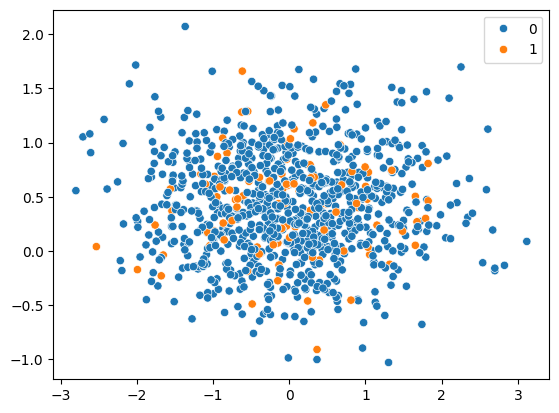

In [211]:
sns.scatterplot(x=X_imb[:,0], y=X_imb[:,1], hue=y_imb)

In [212]:
from sklearn.model_selection import train_test_split
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)
model_imb = LogisticRegression()
penalty = ['l1', 'l2',' elasticnet']
c_val = [0.01, 0.1, 1, 10, 100]
solvers = ['liblinear', 'saga', 'lbfgs']
class_weight = [{0:w,1:y}for w in [1,5,10,100] for y in [1,5,10,100]]
param_imb=dict(penalty=penalty, C=c_val, solver=solvers,class_weight=class_weight)


In [213]:
from sklearn.model_selection import StratifiedKFold
skf_imb = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV
gridCV_imb=GridSearchCV(estimator=model_imb, param_grid=param_imb, cv=skf_imb, n_jobs=-1, scoring='accuracy')

In [214]:
gridCV_imb.fit(X_train_imb, y_train_imb)
y_pred_imb = gridCV_imb.predict(X_test_imb)
accuracy_imb = accuracy_score(y_test_imb, y_pred_imb)
cm_imb = confusion_matrix(y_test_imb, y_pred_imb)
print(f'Imbalanced Dataset Accuracy: {accuracy_imb}')
print(f'Imbalanced Dataset Confusion Matrix:\n{cm_imb}')




/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: Convergence

Imbalanced Dataset Accuracy: 0.975
Imbalanced Dataset Confusion Matrix:
[[176   1]
 [  4  19]]


/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: Convergence

In [215]:
print(f'Best Hyperparameters for Imbalanced Dataset: {gridCV_imb.best_params_}')
print(f'Best Score for Imbalanced Dataset: {gridCV_imb.best_score_}')

Best Hyperparameters for Imbalanced Dataset: {'C': 100, 'class_weight': {0: 5, 1: 5}, 'penalty': 'l1', 'solver': 'saga'}
Best Score for Imbalanced Dataset: 0.9825000000000002


In [216]:
y_pred_tuned_imb = gridCV_imb.predict(X_test_imb)

### ROC AUC curve

In [217]:
# Dummy model - Default output 0
dummy_model_prob=[0 for _ in range(len(y_test))]

In [218]:
model=LogisticRegression()
model.fit(X_train, y_train)
model_prob=model.predict_proba(X_test)
model_prob


array([[3.51112014e-01, 6.48887986e-01],
       [1.32095334e-01, 8.67904666e-01],
       [5.24593248e-01, 4.75406752e-01],
       [1.47364774e-01, 8.52635226e-01],
       [4.45002438e-02, 9.55499756e-01],
       [9.45724448e-01, 5.42755520e-02],
       [7.82234155e-01, 2.17765845e-01],
       [1.78147680e-01, 8.21852320e-01],
       [2.54573593e-01, 7.45426407e-01],
       [6.10423342e-01, 3.89576658e-01],
       [4.93832440e-02, 9.50616756e-01],
       [4.31275944e-01, 5.68724056e-01],
       [9.95203655e-01, 4.79634477e-03],
       [5.13966827e-01, 4.86033173e-01],
       [2.80691771e-01, 7.19308229e-01],
       [7.96254746e-01, 2.03745254e-01],
       [9.23952966e-01, 7.60470342e-02],
       [5.54754830e-02, 9.44524517e-01],
       [1.13056057e-01, 8.86943943e-01],
       [5.28455143e-01, 4.71544857e-01],
       [7.44101488e-03, 9.92558985e-01],
       [7.86898615e-01, 2.13101385e-01],
       [9.51331807e-01, 4.86681931e-02],
       [9.10512490e-01, 8.94875102e-02],
       [2.454074

In [219]:
model_prob[:,1]

array([0.64888799, 0.86790467, 0.47540675, 0.85263523, 0.95549976,
       0.05427555, 0.21776584, 0.82185232, 0.74542641, 0.38957666,
       0.95061676, 0.56872406, 0.00479634, 0.48603317, 0.71930823,
       0.20374525, 0.07604703, 0.94452452, 0.88694394, 0.47154486,
       0.99255899, 0.21310139, 0.04866819, 0.08948751, 0.97545926,
       0.00596722, 0.99947947, 0.93734068, 0.01483213, 0.96289128,
       0.86379686, 0.98419604, 0.55123316, 0.15747419, 0.29963554,
       0.22722364, 0.06013618, 0.45282654, 0.04716465, 0.34047867,
       0.02034041, 0.93918881, 0.07663384, 0.4788061 , 0.45191625,
       0.01143991, 0.98989525, 0.00539448, 0.82740933, 0.98773825,
       0.08141001, 0.08508543, 0.01382037, 0.99603785, 0.99602456,
       0.65829944, 0.01821615, 0.08597685, 0.81547051, 0.16762497,
       0.72032391, 0.10492042, 0.09956217, 0.99937402, 0.99900915,
       0.04930289, 0.9828376 , 0.71136103, 0.69320518, 0.26146545,
       0.12645122, 0.46879714, 0.43532668, 0.13793146, 0.12470

In [220]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
dummy_model_auc=roc_auc_score(y_test, dummy_model_prob)
model_auc=roc_auc_score(y_test, model_prob[:,1])
print(f'Dummy Model AUC: {dummy_model_auc}')
print(f'Logistic Regression Model AUC: {model_auc}')

Dummy Model AUC: 0.5
Logistic Regression Model AUC: 0.9216159179981912


In [221]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, threshold = roc_curve(y_test, model_prob[:,1])

In [222]:
threshold

array([       inf, 0.99982728, 0.93918881, 0.93734068, 0.89755377,
       0.89698957, 0.89076141, 0.89029953, 0.86790467, 0.86379686,
       0.75462   , 0.74542641, 0.72032391, 0.71930823, 0.54838445,
       0.50959859, 0.47540675, 0.47415768, 0.47154486, 0.45282654,
       0.44759667, 0.42968574, 0.42350886, 0.37052246, 0.34488493,
       0.29963554, 0.2901814 , 0.2897913 , 0.26458996, 0.21776584,
       0.21477485, 0.20374525, 0.20220372, 0.17080913, 0.16762497,
       0.11042754, 0.10687285, 0.08746126, 0.08597685, 0.05417559,
       0.0539411 , 0.0130019 , 0.00807431, 0.00281658])

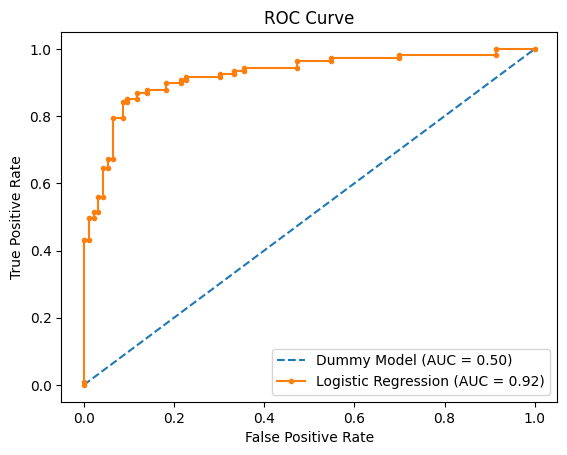

In [223]:
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model (AUC = %0.2f)' % dummy_model_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression (AUC = %0.2f)' % model_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

/var/folders/2l/js00yjg51gq808y69ljjy35w0000gp/T/ipykernel_43367/3770784878.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


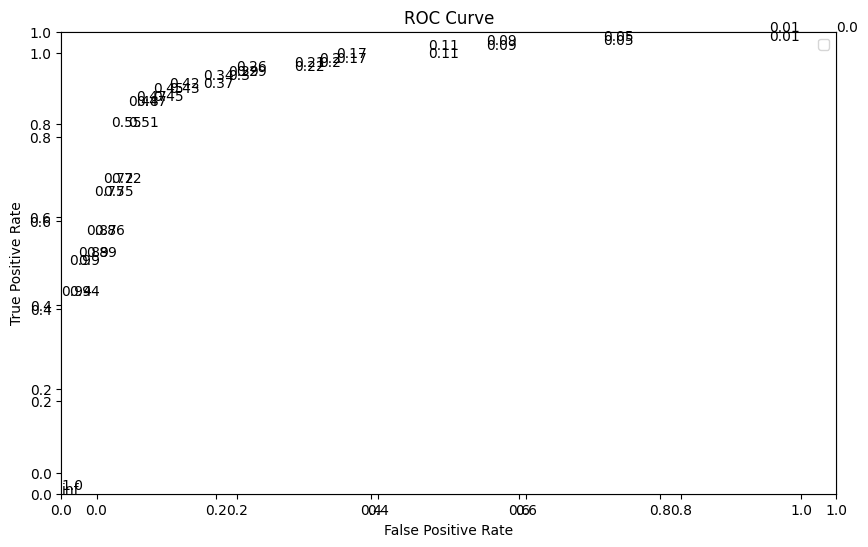

In [ ]:
fig=plt.figure(figsize=(10,6))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model (AUC = %0.2f)' % dummy_model_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression (AUC = %0.2f)' % model_auc)
ax=fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, threshold):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0], xyz[1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()